In [1]:
import copy
import numpy as np
import os
import matplotlib.pyplot as plt
import pprint

from copy import deepcopy
from evo.core import metrics, sync
from evo.core.trajectory import PosePath3D
from evo.tools import plot

from tum_tools import *
from tum_definitions import *

%load_ext autoreload
%autoreload 2

%matplotlib inline
%matplotlib widget


In [2]:
# Load previously computed data
import pickle

gt_file = "data/gt_poses.pkl"
traj_file = "data/kiss_trajectories_corrected.pkl"

with open(gt_file, 'rb') as f:
    gt_dict = pickle.load(f)
    
with open(traj_file, 'rb') as f:
    traj_dict = pickle.load(f)
    
    

In [3]:
# Extract relevant data
traj_ref = gt_dict['trajectory']
traj_est = traj_dict['mdv3_ouster_no_merge'][2]



In [4]:
# Align data
max_diff = 0.01

traj_ref, traj_est = sync.associate_trajectories(traj_ref, traj_est, max_diff)


In [ ]:
# Compute Metrics
ape_metric = metrics.APE()
ape_metric.process_data((traj_ref, traj_est))
ape_stats = ape_metric.get_all_statistics()
pprint.pprint(ape_stats)

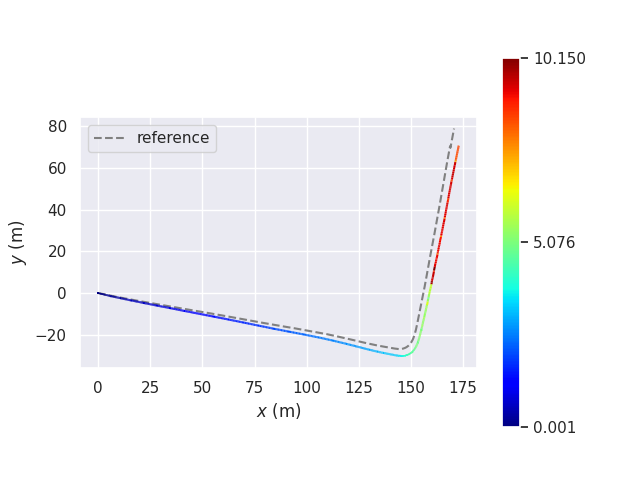

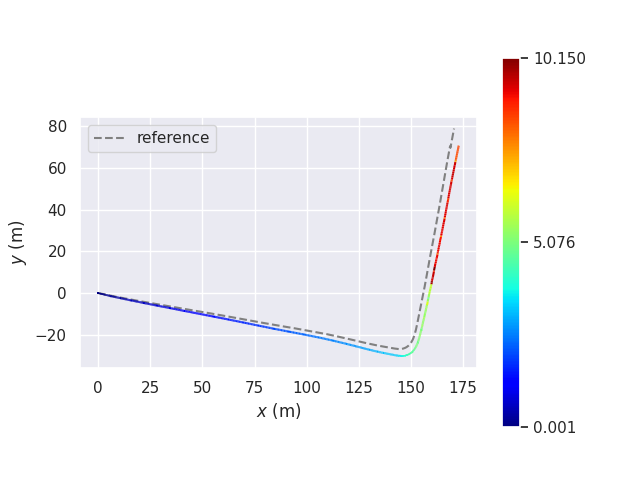

In [10]:
plot_ape_errors(traj_ref, traj_est, ape_metric, ape_stats)

Info: Did not found a recorded trajectory for mdv3_full_no_merge


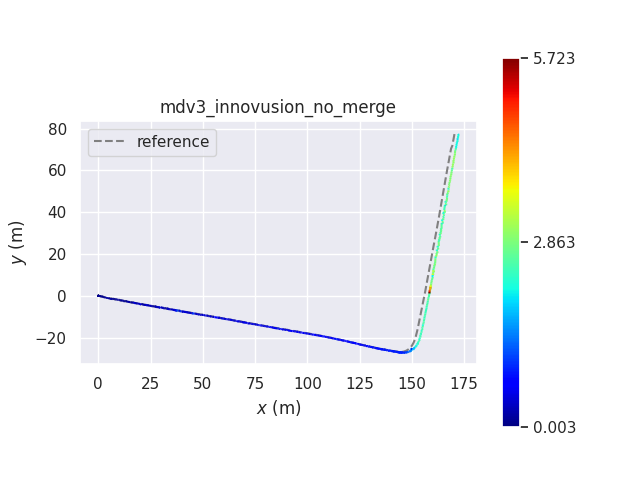

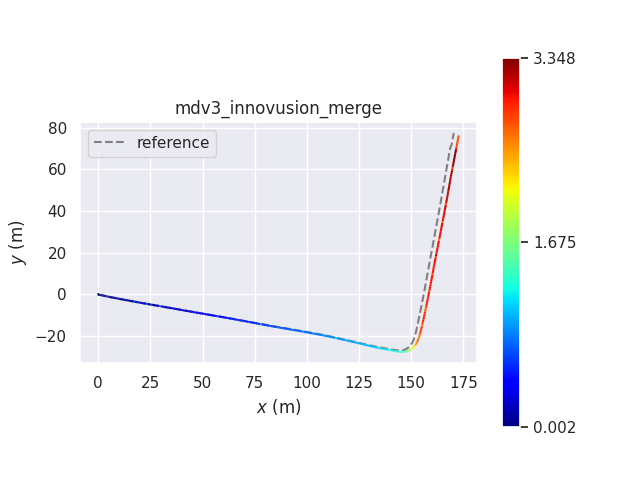

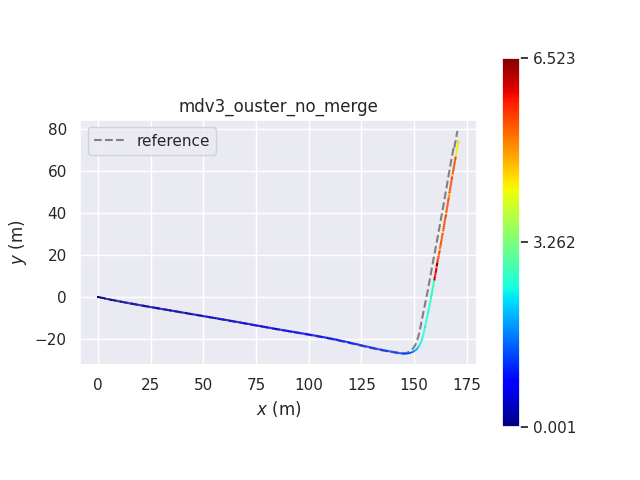

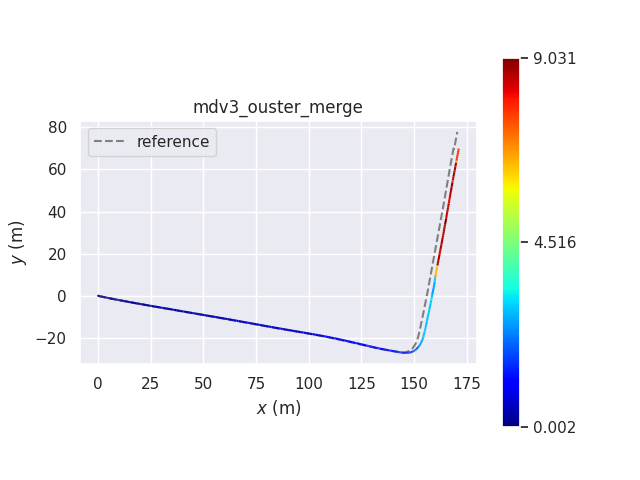

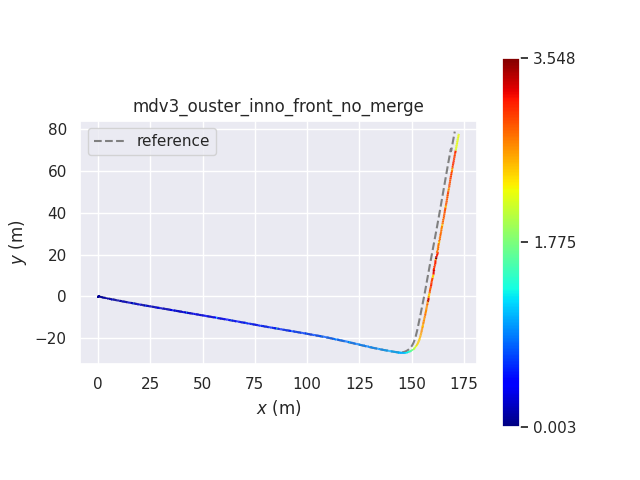

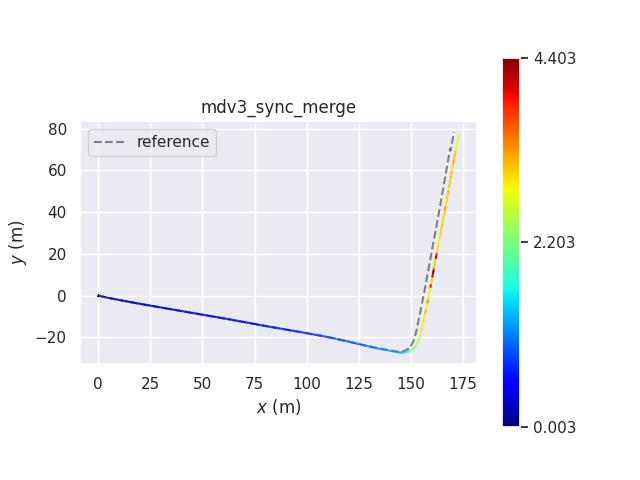

In [8]:
# PLOT THE FULL SET

max_diff = 0.01
results = {}

for recording in Mdv3Dataset:
    if traj_dict.get(recording.value) is None:
        print(f"Info: Did not found a recorded trajectory for {recording.value}")
        continue

    traj_ref = gt_dict['trajectory']
    traj_est = traj_dict[recording.value][2]
    traj_ref, traj_est = sync.associate_trajectories(traj_ref, traj_est, max_diff)
    
    ape_metric = metrics.APE()
    ape_metric.process_data((traj_ref, traj_est))
    ape_stats = ape_metric.get_all_statistics()
    plot_ape_errors(traj_ref, traj_est, ape_metric, ape_stats, title=recording.value)
    results[recording.value] = ape_stats
    

In [9]:
for recording, stats in results.items():
    print(f"Statistics for {recording}")
    pprint.pprint(stats)

Statistics for mdv3_innovusion_no_merge
{'max': 5.723206111705538,
 'mean': 0.9534056692797417,
 'median': 0.6305389286554157,
 'min': 0.0029608619571031944,
 'rmse': 1.3775149268811953,
 'sse': 1808.3626472128212,
 'std': 0.9942660627647675}
Statistics for mdv3_innovusion_merge
{'max': 3.3484109242069318,
 'mean': 1.0990454674471537,
 'median': 0.7860014711745064,
 'min': 0.0017684080683035921,
 'rmse': 1.56015067810998,
 'sse': 1165.9195962969675,
 'std': 1.1073252453055054}
Statistics for mdv3_ouster_no_merge
{'max': 6.5228138226877945,
 'mean': 1.3344933043718132,
 'median': 0.7237273633795576,
 'min': 0.0012983466323013937,
 'rmse': 2.1449226567029034,
 'sse': 4209.634280962258,
 'std': 1.6792322125972452}
Statistics for mdv3_ouster_merge
{'max': 9.030600734888903,
 'mean': 1.6979569195910136,
 'median': 0.7533271733875762,
 'min': 0.002371719730843544,
 'rmse': 3.1083073136442088,
 'sse': 4260.754291019848,
 'std': 2.6035584601208925}
Statistics for mdv3_ouster_inno_front_no_merg

In [ ]:
plot_trajectories_from_poses(traj_ref, traj_est)